## Installation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Loading Data

In [2]:
train=pd.read_csv(r'E:\Job\IYKRA\task\modul5\house price prediction\train.csv')
test=pd.read_csv(r'E:\Job\IYKRA\task\modul5\house price prediction\test.csv')

In [3]:
print('Train data shape:', train.shape)
print('Test data shape:', test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


In [4]:
#to make it is full displayed
pd.set_option('display.max.columns', None)
pd.set_option('display.precision',2)
train.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
type(train) #should be dataframe

pandas.core.frame.DataFrame

In [6]:
train.info() #the data type seems OK

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1379.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.500,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,46.549,567.240,1057.429,1162.627,346.992,5.845,1515.464,0.425,0.058,1.565,0.383,2.866,1.047,6.518,0.613,1978.506,1.767,472.980,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.610,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,161.319,441.867,438.705,386.588,436.528,48.623,525.480,0.519,0.239,0.551,0.503,0.816,0.220,1.625,0.645,24.690,0.747,213.805,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.000,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,1900.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.750,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,0.000,223.000,795.750,882.000,0.000,0.000,1129.500,0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,1961.000,1.000,334.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.500,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,0.000,477.500,991.500,1087.000,0.000,0.000,1464.000,0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,1980.000,2.000,480.000,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.250,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,0.000,808.000,1298.250,1391.250,728.000,0.000,1776.750,1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,2002.000,2.000,576.000,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.000,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,1474.000,2336.000,6110.000,4692.000,2065.000,572.000,5642.000,3.000,2.000,3.000,2.000,8.000,3.000,14.000,3.000,2010.000,4.000,1418.000,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


## Duplicated Data

In [8]:
#Duplicated data
print('rows before removing duplicated data', len(train))
train.drop_duplicates(keep=False,inplace=True) 
print('rows after removing duplicated data', len(train))
#no duplicated data is detected

rows before removing duplicated data 1460
rows after removing duplicated data 1460


## Missing Value

In [9]:
#listing the missing value
null_column=train.columns[train.isnull().any()].tolist()
missing=pd.DataFrame(train[null_column].isnull().sum().sort_values(ascending=False))
missing['ratio(%)']=missing[0]/len(train)*100
missing['type']=train[missing.index].dtypes
missing.reset_index(level=0, inplace=True)
missing.rename(columns={'index':'variables', 0:'total'}, inplace=True)
missing

,variables,total,ratio(%),type
0,PoolQC,1453,99.521,object
1,MiscFeature,1406,96.301,object
2,Alley,1369,93.767,object
3,Fence,1179,80.753,object
4,FireplaceQu,690,47.260,object
5,LotFrontage,259,17.740,float64
6,GarageYrBlt,81,5.548,float64
7,GarageType,81,5.548,object
8,GarageFinish,81,5.548,object
9,GarageQual,81,5.548,object


In [10]:
#drop several columns that have too many NAs
t=40
variable_to_drop=missing[missing['ratio(%)']>=t]
name_variable_to_drop=variable_to_drop['variables'].values.tolist()
train.drop(name_variable_to_drop, axis=1, inplace=True)
print('dimension after removing columns with too many NAs', train.shape)

dimension after removing columns with too many NAs (1460, 76)


##### impute values

In [11]:
#select the numerical data
num_train=train.select_dtypes(include=[np.number])
num_train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


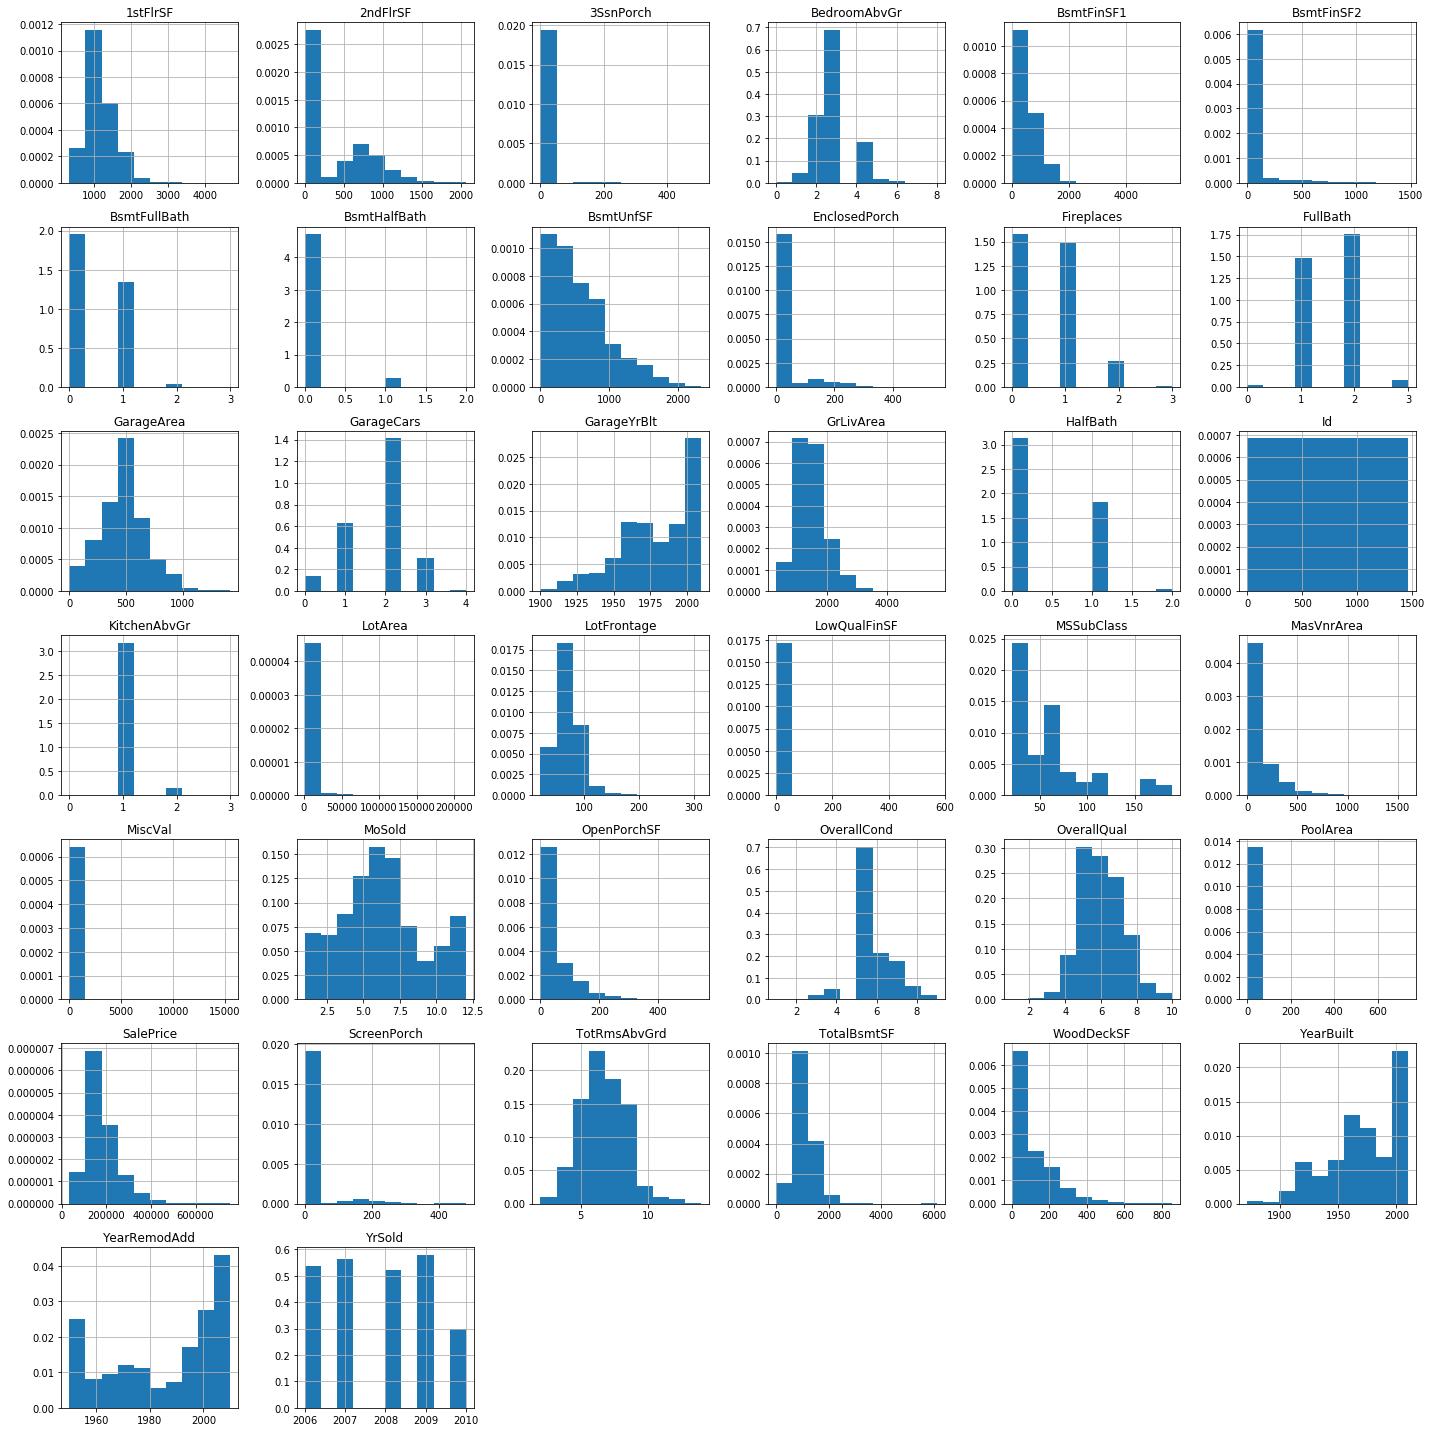

In [12]:
#plotting histogram for numberical values
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
num_train.hist(ax=ax, density=True)
plt.tight_layout()
plt.show()

In [13]:
#to check the distribution in order to imput NA value
abs(num_train.skew(axis = 0, skipna = True)).sort_index(ascending=False)

YrSold           0.096
YearRemodAdd     0.504
YearBuilt        0.613
WoodDeckSF       1.541
TotalBsmtSF      1.524
TotRmsAbvGrd     0.676
ScreenPorch      4.122
SalePrice        1.883
PoolArea        14.828
OverallQual      0.217
OverallCond      0.693
OpenPorchSF      2.364
MoSold           0.212
MiscVal         24.477
MasVnrArea       2.669
MSSubClass       1.408
LowQualFinSF     9.011
LotFrontage      2.164
LotArea         12.208
KitchenAbvGr     4.488
Id               0.000
HalfBath         0.676
GrLivArea        1.367
GarageYrBlt      0.649
GarageCars       0.343
GarageArea       0.180
FullBath         0.037
Fireplaces       0.650
EnclosedPorch    3.090
BsmtUnfSF        0.920
BsmtHalfBath     4.103
BsmtFullBath     0.596
BsmtFinSF2       4.255
BsmtFinSF1       1.686
BedroomAbvGr     0.212
3SsnPorch       10.304
2ndFlrSF         0.813
1stFlrSF         1.377
dtype: float64

In [14]:
#make the variables become more normal
train[['LotArea']]=np.log(train[['LotArea']])
train[['LotArea']].skew()

LotArea   -0.138
dtype: float64

In [15]:
#drop significant skew variables
train.drop(['PoolArea','MiscVal', '3SsnPorch'] ,axis=1, inplace=True)

LotFrontage has skewness: 2.164


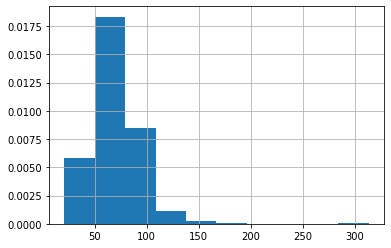

LotFrontage has skewness: -0.649


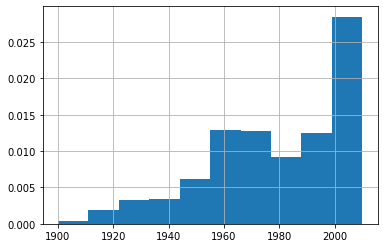

In [16]:
#take a deep look to Lot Frontage and garageYrBlt
train.LotFrontage.unique()
train.LotFrontage.hist(density=True)
plt.title(print('LotFrontage has skewness:' , round(num_train.LotFrontage.skew(axis = 0, skipna = True),3)))
plt.show()

train.GarageYrBlt.unique()
train.GarageYrBlt.hist(density=True)
plt.title(print('GarageYrBlt has skewness:' , round(num_train.GarageYrBlt.skew(axis = 0, skipna = True),3)))
plt.show()

In [17]:
# some numerical columns with median
kol=['LotFrontage','GarageYrBlt', 'MasVnrArea']
median = train[kol].median()
train[kol] = train[kol].fillna(value=median)

In [18]:
#select the categorical data
cat_train=train.select_dtypes(exclude=[np.number])
cat_train.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

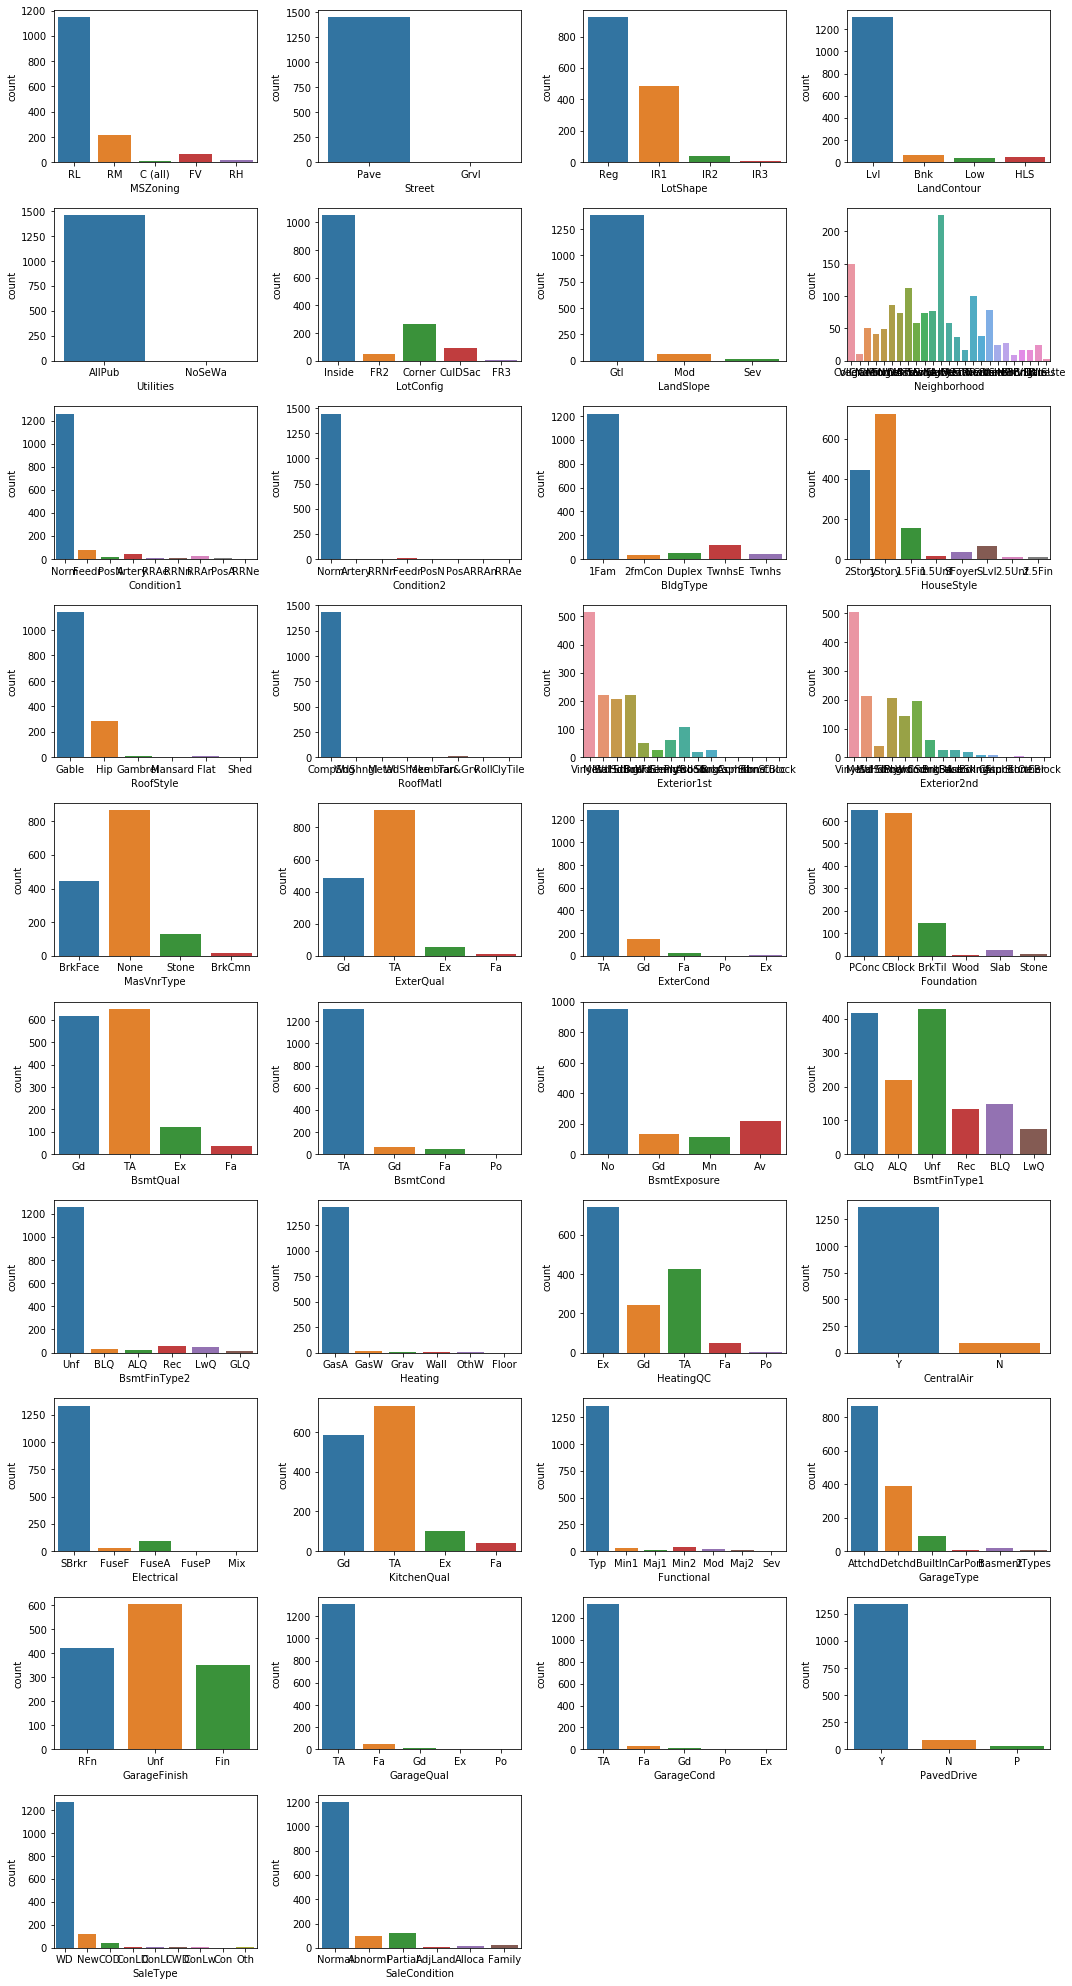

In [19]:
#plotting barchart for categorical values
no=1
fig = plt.figure(figsize=(15,30))
for i in range(cat_train.shape[1]):
    fig.add_subplot(11, 4, no)
    sn.countplot(data=cat_train, x=cat_train.columns[i], orient='v')
    no=no+1
plt.tight_layout()
plt.show()
#It seems no redundant unique

In [20]:
# categorical value with mode
kol=cat_train.columns
mode = train[kol].mode()
train[kol]=train[kol].fillna(value=mode.iloc[0], inplace=False)
print('train data shape after removing NAs', train.shape)

train data shape after removing NAs (1460, 73)


In [21]:
print('total NAs now is', sum(train.isnull().sum()!=0))

total NAs now is 0


## Exploratory Data Analysis

In [22]:
#Check the target variable
train.SalePrice.describe()

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64

Skew before transformed is: 1.883


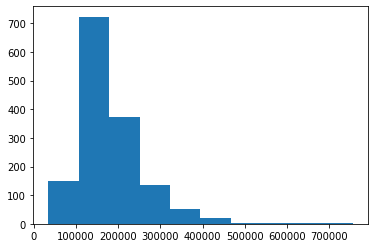

In [23]:
#check the target distribution
print('Skew before transformed is:', round(train.SalePrice.skew(),3))
plt.hist(train.SalePrice)
plt.show()

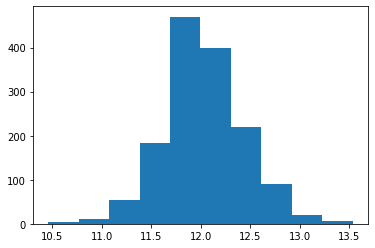

Skew after transformed is: 0.121


In [24]:
#the target (SalePrice) should be transform to log
target=np.log(train.SalePrice)
plt.hist(target)
plt.show()
print('Skew after transformed is:', round(target.skew(),3))

In [25]:
#hot one encoder for categorical values
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()
for i in range(cat_train.shape[1]):
    train[cat_train.columns[i]]= lbl.fit_transform(train[cat_train.columns[i]])
print('train shape is', train.shape)
train.head()

train shape is (1460, 73)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.000,9.042,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.000,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,2003.000,1,2,548,4,4,2,0,61,0,0,2,2008,8,4,208500
1,2,20,3,80.000,9.170,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.000,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1,1976.000,1,2,460,4,4,2,298,0,0,0,5,2007,8,4,181500
2,3,60,3,68.000,9.328,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.000,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,1,2001.000,1,2,608,4,4,2,0,42,0,0,9,2008,8,4,223500
3,4,70,3,60.000,9.164,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.000,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,5,1998.000,2,3,642,4,4,2,0,35,272,0,2,2006,8,0,140000
4,5,60,3,84.000,9.565,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.000,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,1,2000.000,1,3,836,4,4,2,192,84,0,0,12,2008,8,4,250000


In [26]:
train.info() #to check that all variable has already became numerical values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   int32  
 6   LotShape       1460 non-null   int32  
 7   LandContour    1460 non-null   int32  
 8   Utilities      1460 non-null   int32  
 9   LotConfig      1460 non-null   int32  
 10  LandSlope      1460 non-null   int32  
 11  Neighborhood   1460 non-null   int32  
 12  Condition1     1460 non-null   int32  
 13  Condition2     1460 non-null   int32  
 14  BldgType       1460 non-null   int32  
 15  HouseStyle     1460 non-null   int32  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [27]:
#check the correlation of all numerical data (Pearson correlation)
corr=train.corr()
print(corr['SalePrice'].sort_values(ascending=False).head())
print(corr['SalePrice'].sort_values(ascending=False).tail())

SalePrice     1.000
OverallQual   0.791
GrLivArea     0.709
GarageCars    0.640
GarageArea    0.623
Name: SalePrice, dtype: float64
HeatingQC      -0.400
GarageFinish   -0.537
KitchenQual    -0.589
BsmtQual       -0.618
ExterQual      -0.637
Name: SalePrice, dtype: float64


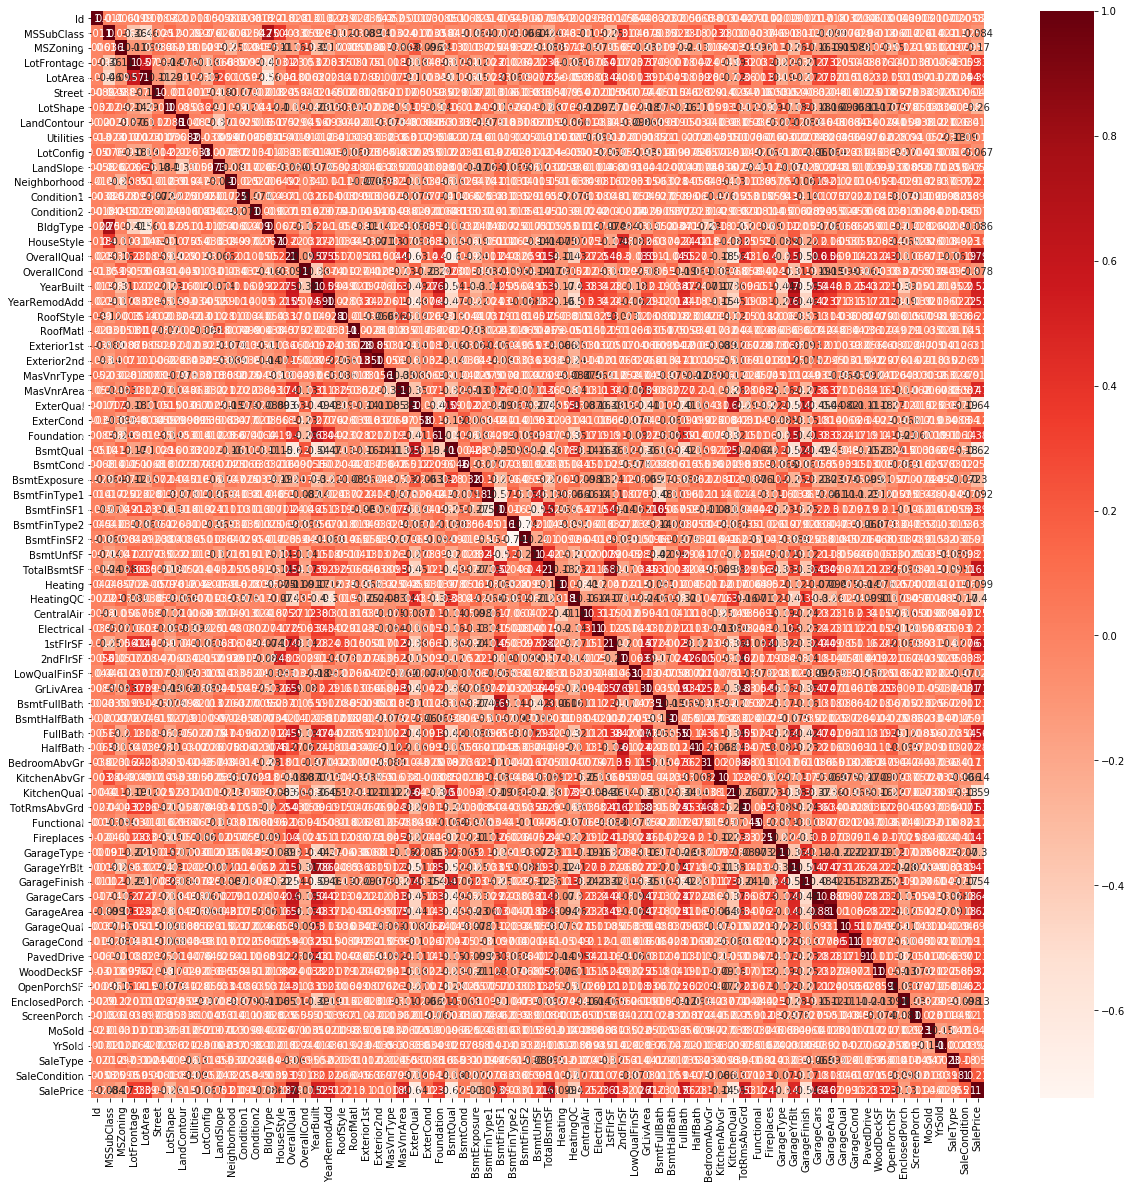

In [28]:
#visualize the heatmap
plt.figure(figsize=(20,20))
sn.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()
#mostly they are no multicollinearity, shown from the bright colors of heatmap

In [29]:
#Correlation with output variable
corr_target = abs(corr["SalePrice"])
#Selecting highly correlated features
relevant_features = pd.DataFrame((corr_target[corr_target>0.5]).sort_values(ascending=False))
relevant_features.columns=['correlation w/ SalePrice']
relevant_features.index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'ExterQual',
       'GarageArea', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'KitchenQual',
       'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

In [30]:
#check the highest correlation
train.OverallQual.value_counts().sort_index() 
#so we would use barchart

1       2
2       3
3      20
4     116
5     397
6     374
7     319
8     168
9      43
10     18
Name: OverallQual, dtype: int64

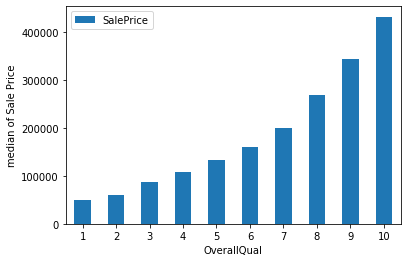

In [31]:
#barchart
OverallQual_pivot=train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
OverallQual_pivot.plot(kind='bar')
plt.ylabel('median of Sale Price')
plt.xticks(rotation=0)
plt.show()

In [32]:
#check the second highest correlation
train.GrLivArea.value_counts().sort_index()
#so we would use scatter plotS

334     1
438     1
480     1
520     1
605     1
       ..
3627    1
4316    1
4476    1
4676    1
5642    1
Name: GrLivArea, Length: 861, dtype: int64

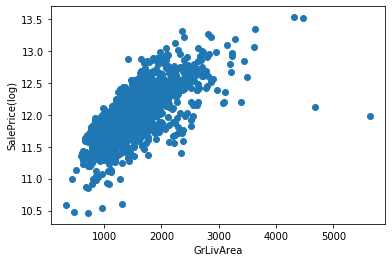

In [33]:
#scatterplot
plt.scatter(x=train.GrLivArea, y=target)  #we use log SalePrice (target)
plt.ylabel('SalePrice(log)')
plt.xlabel('GrLivArea')
plt.show()
#it has some outliers, then

## Modelling

In [34]:
#define dependent and independent variable
#y=np.log(train.SalePrice)
y=np.log(train.SalePrice)
X=train.drop(['SalePrice','Id'], axis=1)

In [35]:
#define training and testing dataset from train.csv
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=42, test_size=0.33)

In [36]:
#regression
from sklearn import linear_model
lr=linear_model.LinearRegression(normalize=False)
model_lr=lr.fit(X_train,y_train)
model_lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
#SVM
from sklearn.svm import SVR
clf = SVR(kernel='poly')
model_svm=clf.fit(X_train, y_train)
model_svm

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [38]:
#random forest
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=3)
model_rf=regr.fit(X_train, y_train)

## Evaluation

In [39]:
#R^2 is to measure how close the data are to the fitted regression line
print('R^2 score for linear regression is', round(model_lr.score(X_test, y_test),3)) #it seems a good fit
print('R^2 score for SVM is', round(model_svm.score(X_test, y_test),3)) #it seems not good
print('R^2 score for random forest is', round(model_rf.score(X_test, y_test),3)) #it seems not good

R^2 score for linear regression is 0.873
R^2 score for SVM is 0.816
R^2 score for random forest is 0.775


In [40]:
#predition
pred_lr=model_lr.predict(X_test)
pred_svm=model_svm.predict(X_test)
pred_rf=model_rf.predict(X_test)

In [41]:
#RMSE is to measure the distance between our predicted values and actual values
from sklearn.metrics import mean_squared_error
print('RMSE for linear regression is', round(mean_squared_error(y_test, pred_lr),3))
print('RMSE for SVM is', round(mean_squared_error(y_test, pred_svm),3))
print('RMSE for random forest is', round(mean_squared_error(y_test, pred_rf),3))

RMSE for linear regression is 0.022
RMSE for SVM is 0.031
RMSE for random forest is 0.038


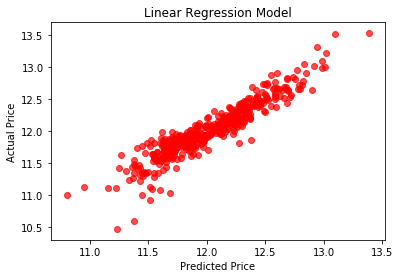

In [42]:
#visualize it
actual_values=y_test
plt.scatter(pred_lr, actual_values, alpha=0.7, color='r') #alpha is to help see the overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

## Improve Model

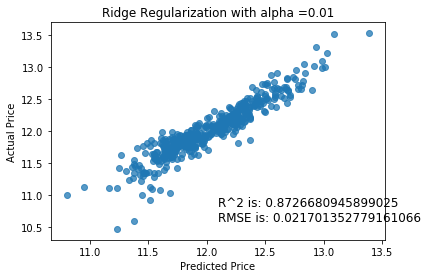

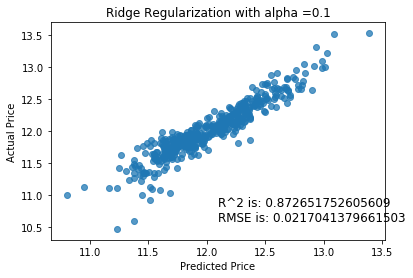

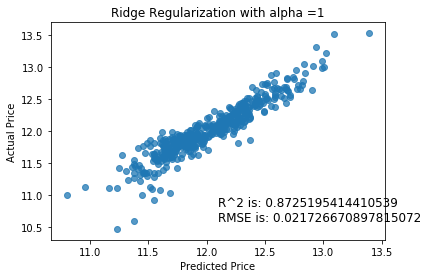

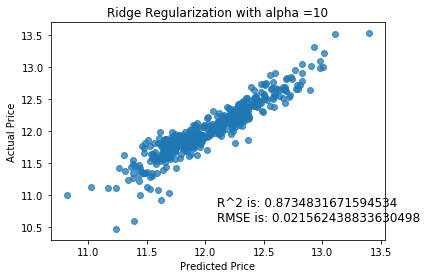

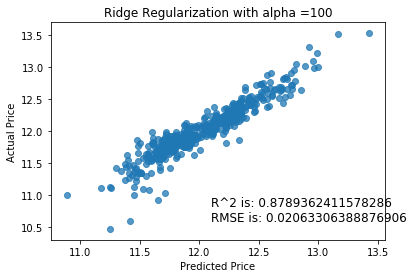

In [43]:
#For Linear Regression
#Use Ridge Regularization: decrease the influence of less important
#parameter= alpha --> it would be looped and see the changes of results
for i in range (-2,3):
    alpha=10**i
    rm=linear_model.Ridge(alpha=alpha)
    ridge_model=rm.fit(X_train, y_train)
    preds_ridge=ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=0.75)
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha ={}'. format(alpha))
    overlay='R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay, xy=(12.1,10.6), size='large')
    plt.show()
    
#it seems the results don't improve the first model

## Submission

In [44]:
#create new dataframe to store the works
submit_lr=pd.DataFrame()
submit_lr['Id']=test.Id
submit_svm=pd.DataFrame()
submit_svm['Id']=test.Id
submit_rf=pd.DataFrame()
submit_rf['Id']=test.Id

In [45]:
#drop several columns that have too many NAs
print('dimension before removing columns with too many NAs', test.shape)
test.drop(name_variable_to_drop, axis=1, inplace=True)
print('dimension after removing columns with too many NAs', test.shape)

dimension before removing columns with too many NAs (1459, 80)
dimension after removing columns with too many NAs (1459, 75)


In [46]:
# some numerical columns with median
kol=['LotFrontage','GarageYrBlt', 'MasVnrArea']
median = train[kol].median()
test[kol] = test[kol].fillna(value=median)

In [47]:
#select the categorical data
cat_test=test.select_dtypes(exclude=[np.number])
cat_test.columns
# categorical value with mode
kol=cat_test.columns
mode = test[kol].mode()
test[kol]=test[kol].fillna(value=mode.iloc[0], inplace=False)
print('test data shape after removing NAs', test.shape)

test data shape after removing NAs (1459, 75)


In [48]:
#hot one encoder for categorical values
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()
for i in range(cat_test.shape[1]):
    test[cat_test.columns[i]]= lbl.fit_transform(test[cat_test.columns[i]])
print('test shape is', test.shape)
test.head()

test shape is (1459, 75)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.000,11622,1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,0,10,12,2,0.000,3,4,1,3,3,3,4,468.000,3,144.000,270.000,882.000,0,4,1,3,896,0,0,896,0.000,0.000,1,0,2,1,3,5,6,0,1,1961.000,2,1.000,730.000,3,4,2,140,0,0,0,120,0,0,6,2010,8,4
1,1462,20,3,81.000,14267,1,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,0,11,13,1,108.000,3,4,1,3,3,3,0,923.000,5,0.000,406.000,1329.000,0,4,1,3,1329,0,0,1329,0.000,0.000,1,1,3,1,2,6,6,0,1,1958.000,2,1.000,312.000,3,4,2,393,36,0,0,0,0,12500,6,2010,8,4
2,1463,60,3,74.000,13830,1,0,3,0,4,0,8,2,2,0,4,5,5,1997,1998,1,0,10,12,2,0.000,3,4,2,2,3,3,2,791.000,5,0.000,137.000,928.000,0,2,1,3,928,701,0,1629,0.000,0.000,2,1,3,1,3,6,6,1,1,1997.000,0,2.000,482.000,3,4,2,212,34,0,0,0,0,0,3,2010,8,4
3,1464,60,3,78.000,9978,1,0,3,0,4,0,8,2,2,0,4,6,6,1998,1998,1,0,10,12,1,20.000,3,4,2,3,3,3,2,602.000,5,0.000,324.000,926.000,0,0,1,3,926,678,0,1604,0.000,0.000,2,1,3,1,2,7,6,1,1,1998.000,0,2.000,470.000,3,4,2,360,36,0,0,0,0,0,6,2010,8,4
4,1465,120,3,43.000,5005,1,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,0,6,6,2,0.000,2,4,2,2,3,3,0,263.000,5,0.000,1017.000,1280.000,0,0,1,3,1280,0,0,1280,0.000,0.000,2,0,2,1,2,5,6,0,1,1992.000,1,2.000,506.000,3,4,2,0,82,0,0,144,0,0,1,2010,8,4


In [49]:
test.columns[test.isnull().any()].tolist()

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageCars',
 'GarageArea']

In [50]:
test=test.select_dtypes(include=[np.number]).interpolate().dropna()
test.columns[test.isnull().any()].tolist()

[]

In [51]:
test.drop(['Id'], axis=1, inplace=True)

In [52]:
#make the variables become more normal
test[['LotArea']]=np.log(test[['LotArea']])
test[['LotArea']].skew()

LotArea   -0.916
dtype: float64

In [53]:
#drop significant skew variables
test.drop(['PoolArea','MiscVal', '3SsnPorch'] ,axis=1, inplace=True)

In [54]:
#then generates the predictions
pred_lr=model_lr.predict(test)
#don't forget to transform SalePrice back since it is log already now
final_pred_lr=np.exp(pred_lr)
#let's compare
print('original predictions for linear regression are: ', pred_lr[:3])
print('final predictions for linear regression are: ', final_pred_lr[:3])

original predictions for linear regression are:  [11.70130293 11.92809146 12.06046103]
final predictions for linear regression are:  [120728.91329835 151462.21418016 172898.67798568]


In [55]:
#then generates the predictions
pred_svm=model_svm.predict(test)
#don't forget to transform SalePrice back since it is log already now
final_pred_svm=np.exp(pred_svm)
#let's compare
print('original predictions for SVM are: ', pred_svm[:3])
print('final predictions for SVM are: ', final_pred_svm[:3])

original predictions for SVM are:  [11.78657233 12.01664734 12.16217992]
final predictions for SVM are:  [131475.04324161 165486.90370079 191411.32430969]


In [56]:
#then generates the predictions
pred_rf=model_rf.predict(test)
#don't forget to transform SalePrice back since it is log already now
final_pred_rf=np.exp(pred_rf)
#let's compare
print('original predictions for random forest are: ', pred_rf[:3])
print('final predictions for random forest are: ', final_pred_rf[:3])

original predictions for random forest are:  [11.75932975 11.79025195 12.02061772]
final predictions for random forest are:  [127941.67159435 131959.7123331  166145.25663737]


In [57]:
#assign again to the previous storage
submit_lr['SalePrice']=final_pred_lr
submit_lr.head()
submit_svm['SalePrice']=final_pred_svm
submit_rf['SalePrice']=final_pred_rf

In [58]:
#to csv
submit_lr.to_csv('submit_lr.csv', index=False)
submit_svm.to_csv('submit_svm.csv', index=False)
submit_rf.to_csv('submit_rf.csv', index=False)